# Exploring Life Expectancy, Aid, Health Services, and Access

Team: Andrea Pope, Dominic Delmolino, Sarah Kelley

Data came from the World Health Organization, available at http://apps.who.int/gho/data/node.main. We downloaded individual data sets for Life Expectancy, Aid, Health Services, HIV prevalances, and Acccess. 

## Imports and Data

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

Data Imports:

In [2]:
df_le = pd.read_csv("LifeExpectancy.csv") #various life expectancy measures
HIV = pd.read_csv("HIV.csv") #HIV prevalance
HS = pd.read_csv("health_services.csv") #Expenditures on Health Services
df_exp = pd.read_csv("access_to_water.csv") #Access to clean water and sanitation
df_c = pd.read_csv("Commitments_n_DisbursementsofAidbyCountry.csv")

## Life Expectancy Data Preparation

In [3]:
df_le.columns = ["Country; Year", "LEatBirth", "LEatBirthFem", "LEatBirthMale","LEat60", "LEat60Female", 
                 "LEat60Male","HALEatBirth","HALEatBirthFemale", "HALEatBirthMale"]
# Seperating Country from Year in initial cell to 2 separate cells
df_le['Country'], df_le['Year'] = zip(*df_le['Country; Year'].apply(lambda x: x.split('; ', 1)))

In [4]:
# convert year into date format
df_le['Year'] = pd.to_datetime(df_le['Year'], format='%Y')

In [5]:
# function to use on number fields that contain multiple answers, in order to update number fields appropriately
# data is at year level, so ints can be used (vs floats)
def clean_le(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return int(value[0:2])

In [6]:
# used to convert to float, but check for NaN values first
def clean_float(value):
    if type(value) == type(np.NaN):
        return np.NaN
    return float(value)

In [7]:
# Clean up healthy life expectancy at birth, life expectancy at birth and at 60
df_le['HALEatBirth'] = df_le['HALEatBirth'].apply(clean_le) 
#df_le['LEatBirth'] = df_le['LEatBirth'].apply(clean_le)
#df_le['LEat60'] = df_le['LEat60'].apply(clean_le)

In [8]:
df_le_clean = pd.DataFrame({'Country': df_le.Country, 'Year': df_le.Year, "LEatBirth": df_le.LEatBirth, 
                            "LEat60": df_le.LEat60, "LEat60-Adj": df_le.LEat60 + 60,  "HALEatBirth": df_le.HALEatBirth})

In [9]:
# fully tidied up Life Expectancy Data
df_le_clean.head()

,Country,HALEatBirth,LEat60,LEat60-Adj,LEatBirth,Year
0,Afghanistan,50,16,76,61,2013-01-01
1,Afghanistan,49,16,76,60,2012-01-01
2,Afghanistan,45,15,75,55,2000-01-01
3,Afghanistan,NaN,14,74,49,1990-01-01
4,Albania,65,19,79,74,2013-01-01


In [10]:
# with numeric data columns
df_le_clean.dtypes

Country                object
HALEatBirth           float64
LEat60                  int64
LEat60-Adj              int64
LEatBirth               int64
Year           datetime64[ns]
dtype: object

In [11]:
# in a separate lab notebook, extracted data from WHO website to map Regions to Countries (through a series of WHO web pages)
# output was saved to a csv to be uploaded here, for use in broaded summarizations of the LE data
rc_map = pd.read_csv('RegionCountryMap.csv', encoding='ISO-8859-2')
#rc_map.set_index('Country', inplace=True)

In [12]:
rc_map = rc_map.drop('Unnamed: 0', axis=1)
rc_map.head()

,Country,Region
0,Algeria,Africa
1,Angola,Africa
2,Benin,Africa
3,Botswana,Africa
4,Burkina Faso,Africa


In [13]:
# compare to Region / Country map to look at global trends for 2013
# merging the LE data set with the Region Country map; joining field is "Country"
df_le_clean = pd.merge(df_le_clean, rc_map, on='Country')

df_le_clean.head()

,Country,HALEatBirth,LEat60,LEat60-Adj,LEatBirth,Year,Region
0,Afghanistan,50,16,76,61,2013-01-01,Eastern Mediterranean
1,Afghanistan,49,16,76,60,2012-01-01,Eastern Mediterranean
2,Afghanistan,45,15,75,55,2000-01-01,Eastern Mediterranean
3,Afghanistan,NaN,14,74,49,1990-01-01,Eastern Mediterranean
4,Albania,65,19,79,74,2013-01-01,Europe


## Aid Disbursement Data Preparation

In [14]:
#rename columns
df_c.columns = ["Country; Year", "Commitments", "Disbursements"]

In [15]:
#split country and year
df_c['Country'], df_c['Year'] = zip(*df_c['Country; Year'].apply(lambda x: x.split('; ', 1)))

In [16]:
#make year into date format
df_c['Year'] = pd.to_datetime(df_c['Year'], format='%Y')

In [17]:
#clean up formatting
df_c['Commitments'] = df_c['Commitments'].apply(clean_float)
df_c['Disbursements'] = df_c['Disbursements'].apply(clean_float)

In [18]:
#make a frame of aid commitments by country
commitments_by_country = df_c.groupby('Country')

In [19]:
df_c.head()

,Country; Year,Commitments,Disbursements,Country,Year
0,Afghanistan; 2010,386.92,300.09,Afghanistan,2010-01-01
1,Afghanistan; 2009,254.04,345.59,Afghanistan,2009-01-01
2,Afghanistan; 2008,459.80,254.46,Afghanistan,2008-01-01
3,Afghanistan; 2007,217.22,254.40,Afghanistan,2007-01-01
4,Afghanistan; 2006,334.53,186.74,Afghanistan,2006-01-01


In [20]:
df_c.dtypes

Country; Year            object
Commitments             float64
Disbursements           float64
Country                  object
Year             datetime64[ns]
dtype: object

## Water and Sanitation Data Preparation

In [21]:
#Improve Column Names
df_exp.columns = ["Country; Year", "IWRuralPct","IWUrbanPct","IWPct", "ISRuralPct", "ISUrbanPct", "ISPct"]

In [22]:
df_exp['Country'], df_exp['Year'] = zip(*df_exp['Country; Year'].apply(lambda x: x.split('; ',1)))
df_exp['Year'] = pd.to_datetime(df_exp['Year'], format='%Y')
df_exp.drop(['Country; Year'], inplace=True, axis=1)

In [23]:
#Cleaned Up Sanitation Data Set
df_exp.head()

,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct,Country,Year
0,47.0,78.2,55.3,27.0,45.1,31.9,Afghanistan,2015-01-01
1,24.3,52.2,30.3,21.3,31.2,23.4,Afghanistan,2000-01-01
2,95.2,94.9,95.1,90.2,95.5,93.2,Albania,2015-01-01
3,93.3,100.0,96.1,75.2,94.8,83.4,Albania,2000-01-01
4,NaN,100.0,NaN,68.7,94.5,78.1,Albania,1990-01-01


In [24]:
df_exp.dtypes

IWRuralPct           float64
IWUrbanPct           float64
IWPct                float64
ISRuralPct           float64
ISUrbanPct           float64
ISPct                float64
Country               object
Year          datetime64[ns]
dtype: object

## Health Services Data Preparation

In [25]:
to_drop = list(range(10,22))+ list(range(25,28))
HS = HS.drop(HS.columns[to_drop], axis=1)
HS.columns = ["Country", "Total_pct_GDP2013", "Total_pct_GDP2012", "Total_pct_GDP2000", "Govt_pct_total2013", "Govt_pct_total2012", "Govt_pct_total2000", "Pvt_pct_total2013", "Pvt_pct_total2012", "Pvt_pct_total2000", "Pocket_pct_total2013", "Pocket_pct_total2012", "Pocket_pct_total2000"]

In [26]:
HS.columns

Index(['Country', 'Total_pct_GDP2013', 'Total_pct_GDP2012',
       'Total_pct_GDP2000', 'Govt_pct_total2013', 'Govt_pct_total2012',
       'Govt_pct_total2000', 'Pvt_pct_total2013', 'Pvt_pct_total2012',
       'Pvt_pct_total2000', 'Pocket_pct_total2013', 'Pocket_pct_total2012',
       'Pocket_pct_total2000'],
      dtype='object')

In [27]:
#The challenge here is that this data is organized differently, with the years in the column headers
HS2013 = HS.ix[:,[0,1,4,7, 10]]
HS2012 = HS.ix[:,[0,2,5,8, 11]]
HS2000 = HS.ix[:,[0,3,6,9, 12]]
HS2013["Year"] = pd.Series([2013]*len(HS2013))
HS2013["Year"] = pd.to_datetime(2013, format = '%Y')
HS2012["Year"] = pd.to_datetime(2012, format = '%Y')
HS2000["Year"] = pd.to_datetime(2000, format = '%Y')

c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [28]:
HS2013.head()

,Country,Total_pct_GDP2013,Govt_pct_total2013,Pvt_pct_total2013,Pocket_pct_total2013,Year
0,Afghanistan,8.1,21.2,78.8,73.8,2013-01-01
1,Albania,5.9,48.4,51.6,51.5,2013-01-01
2,Algeria,6.6,74.2,25.8,25.1,2013-01-01
3,Andorra,8.1,75.3,24.7,18.4,2013-01-01
4,Angola,3.8,66.7,33.3,24.4,2013-01-01


In [29]:
col_names = ["Country", "Total_pct_GDP", "Govt_pct_total", "Pvt_pct_total", "Pocket_pct_total", "Year"]
HS2013.columns = col_names
HS2012.columns = col_names
HS2000.columns = col_names

In [30]:
frames = [HS2000, HS2012, HS2013]
df_hs = pd.concat(frames)

In [31]:
df_hs.head()

,Country,Total_pct_GDP,Govt_pct_total,Pvt_pct_total,Pocket_pct_total,Year
0,Afghanistan,NaN,NaN,NaN,NaN,2000-01-01
1,Albania,6.3,36.1,63.9,63.8,2000-01-01
2,Algeria,3.5,73.3,26.7,25.8,2000-01-01
3,Andorra,6.0,64.8,35.2,26.6,2000-01-01
4,Angola,3.4,49.5,50.5,36.1,2000-01-01


In [32]:
df_hs.dtypes

Country                     object
Total_pct_GDP              float64
Govt_pct_total             float64
Pvt_pct_total              float64
Pocket_pct_total           float64
Year                datetime64[ns]
dtype: object

In [33]:
len(df_hs)

573

## HIV Data Cleaning

In [34]:
#removes the ranges and > or < to make clean numbers
variables = list(HIV.columns.values)
for item in variables[1:]: 
    HIV[item] = HIV[item].map(lambda x: x.lstrip('<'))
    HIV[item] = HIV[item].map(lambda x: x[0:3])
HIV = HIV.replace("No ", np.nan)

In [35]:
#makes all of these into floats
HIV.HIV2013 = pd.to_numeric(HIV.HIV2013)
HIV.HIV2009 = pd.to_numeric(HIV.HIV2009)
HIV.HIV2005 = pd.to_numeric(HIV.HIV2005)
HIV.HIV2001 = pd.to_numeric(HIV.HIV2001)

In [36]:
HIV.head()

,Country,HIV2013,HIV2009,HIV2005,HIV2001
0,Afghanistan,0.1,0.1,0.1,0.1
1,Albania,0.1,0.1,0.1,0.1
2,Algeria,0.1,0.1,0.1,0.1
3,Angola,2.4,2.1,1.9,1.8
4,Argentina,NaN,NaN,NaN,NaN


In [37]:
HIV2001 = HIV.ix[:,[0,4]]
HIV2005 = HIV.ix[:,[0,3]]
HIV2009 = HIV.ix[:,[0,2]]
HIV2013 = HIV.ix[:,[0,1]]
HIV2001["Year"] = pd.to_datetime(2001, format = '%Y')
HIV2005["Year"] = pd.to_datetime(2005, format = '%Y')
HIV2009["Year"] = pd.to_datetime(2009, format = '%Y')
HIV2013["Year"] = pd.to_datetime(2013, format = '%Y')

c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [38]:
HIV2001.columns = ["Country", "HIV_Rate", "Year"]
HIV2005.columns = ["Country", "HIV_Rate", "Year"]
HIV2009.columns = ["Country", "HIV_Rate", "Year"]
HIV2013.columns = ["Country", "HIV_Rate", "Year"]

In [39]:
frames = [HIV2001, HIV2005, HIV2009, HIV2013]
df_HIV = pd.concat(frames)

In [40]:
df_HIV.head()

,Country,HIV_Rate,Year
0,Afghanistan,0.1,2001-01-01
1,Albania,0.1,2001-01-01
2,Algeria,0.1,2001-01-01
3,Angola,1.8,2001-01-01
4,Argentina,NaN,2001-01-01


In [41]:
df_HIV.dtypes

Country             object
HIV_Rate           float64
Year        datetime64[ns]
dtype: object

In [42]:
len(df_HIV)

632

In [43]:
# Keeping alternate form for easier analyis of change over time. 
HIV.head()

,Country,HIV2013,HIV2009,HIV2005,HIV2001
0,Afghanistan,0.1,0.1,0.1,0.1
1,Albania,0.1,0.1,0.1,0.1
2,Algeria,0.1,0.1,0.1,0.1
3,Angola,2.4,2.1,1.9,1.8
4,Argentina,NaN,NaN,NaN,NaN


## Life Expectancy Data Exploration

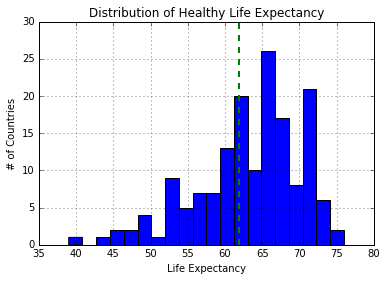

In [44]:
#historgram of HALE for 2013
df_le_clean[df_le_clean.Year=='2013-01-01'].hist('HALEatBirth', bins = 20)
pyplot.ylabel("# of Countries")
pyplot.xlabel("Life Expectancy")
pyplot.title("Distribution of Healthy Life Expectancy")
pyplot.axvline(df_le_clean['HALEatBirth'].mean(), color='g', linestyle='dashed', linewidth=2)

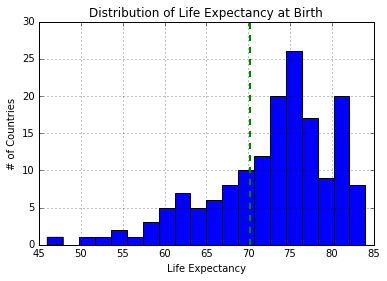

In [45]:
#histogram of Life Expectanct at Birth for 2013
df_le_clean[df_le_clean.Year=='2013-01-01'].hist('LEatBirth', bins = 20)
pyplot.ylabel("# of Countries")
pyplot.xlabel("Life Expectancy")
pyplot.title("Distribution of Life Expectancy at Birth")
pyplot.axvline(df_le_clean['LEatBirth'].mean(), color='g', linestyle='dashed', linewidth=2)

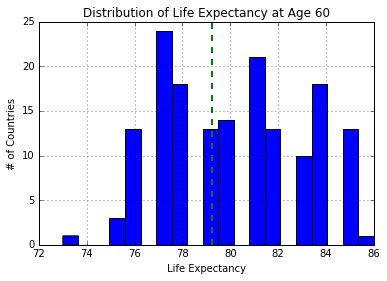

In [46]:
#histogram of Life Expectanct at 60 - using adjusted values to represent total age
df_le_clean[df_le_clean.Year=='2013-01-01'].hist('LEat60-Adj', bins = 20)
pyplot.ylabel("# of Countries")
pyplot.xlabel("Life Expectancy")
pyplot.title("Distribution of Life Expectancy at Age 60")
pyplot.axvline(df_le_clean['LEat60-Adj'].mean(), color='g', linestyle='dashed', linewidth=2)

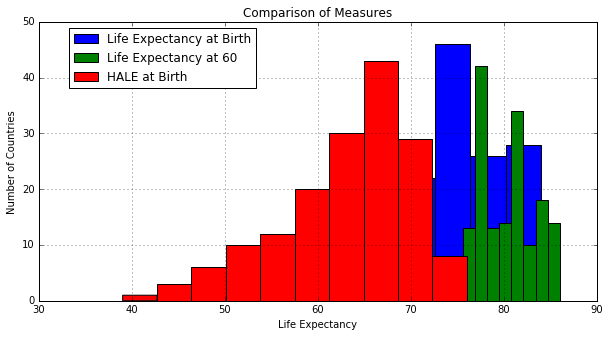

In [47]:
#compare all 3 on 1 graph
df_le_clean[df_le_clean.Year=='2013-01-01'].LEatBirth.hist(label = "Life Expectancy at Birth", figsize = (10,5))
df_le_clean[df_le_clean.Year=='2013-01-01']['LEat60-Adj'].hist(label = "Life Expectancy at 60", figsize = (10,5))
df_le_clean[df_le_clean.Year=='2013-01-01']['HALEatBirth'].hist(label = "HALE at Birth", figsize = (10,5))
pyplot.title ("Comparison of Measures")
pyplot.xlabel("Life Expectancy")
pyplot.ylabel("Number of Countries")
pyplot.legend(bbox_to_anchor=(.4, 1))

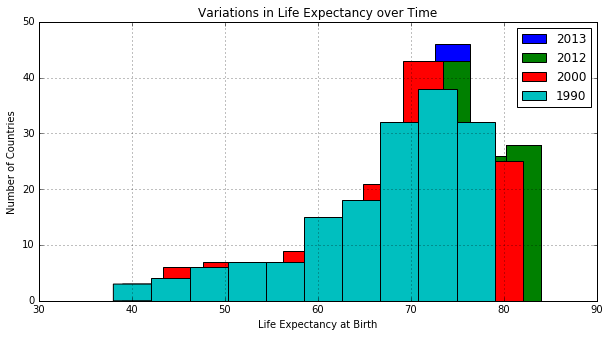

In [48]:
# look in variations over time for LEatBirth
df_le_clean[df_le_clean.Year=='2013-01-01'].LEatBirth.hist(label = "2013", figsize = (10,5))
df_le_clean[df_le_clean.Year=='2012-01-01'].LEatBirth.hist(label = "2012", figsize = (10,5))
df_le_clean[df_le_clean.Year=='2000-01-01'].LEatBirth.hist(label = '2000', figsize = (10,5))
df_le_clean[df_le_clean.Year=='1990-01-01'].LEatBirth.hist(label = '1990', figsize = (10,5))
pyplot.title ("Variations in Life Expectancy over Time")
pyplot.xlabel("Life Expectancy at Birth")
pyplot.ylabel("Number of Countries")
pyplot.legend()

In [49]:
#creating a list of bins to group the year data
ranges = [0, 49, 54, 59, 64, 69, 74, 79, 150]
labels = ['Under 50','50-55','55-60','60-65', '65-70', '70-75', '75-80', 'Over 80']
df_le_clean['LEB'] = pd.cut(df_le_clean['LEatBirth'], ranges, labels=labels).astype('category')
df_le_clean['LE60-Adj'] = pd.cut(df_le_clean['LEat60-Adj'], ranges, labels=labels).astype('category')
df_le_clean['HALE'] = pd.cut(df_le_clean['HALEatBirth'], ranges, labels=labels).astype('category')

In [50]:
df_le_clean[['LEB', 'LE60-Adj', 'HALE']].describe()


,LEB,LE60-Adj,HALE
count,648,648,486
unique,8,3,7
top,70-75,75-80,60-65
freq,174,345,142


In [114]:
df_le_clean[df_le_clean['LEB']=='Over 80'][df_le_clean['Year']=='2012-01-01']

c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


,Country,HALEatBirth,LEat60,LEat60-Adj,LEatBirth,Year,Region,LEB,LE60-Adj,HALE
9,Andorra,72,25,85,83,2012-01-01,Europe,Over 80,Over 80,70-75
25,Australia,73,25,85,83,2012-01-01,Western Pacific,Over 80,Over 80,70-75
29,Austria,70,24,84,81,2012-01-01,Europe,Over 80,Over 80,70-75
57,Belgium,70,23,83,80,2012-01-01,Europe,Over 80,Over 80,70-75
93,Canada,72,25,85,82,2012-01-01,Americas,Over 80,Over 80,70-75
97,Chile,70,24,84,80,2012-01-01,Americas,Over 80,Over 80,70-75
125,Cyprus,74,24,84,82,2012-01-01,Europe,Over 80,Over 80,70-75
133,Denmark,70,23,83,80,2012-01-01,Europe,Over 80,Over 80,70-75
177,Finland,71,24,84,81,2012-01-01,Europe,Over 80,Over 80,70-75
181,France,72,25,85,82,2012-01-01,Europe,Over 80,Over 80,70-75


In [51]:
df_le_clean['LEB'].value_counts()

70-75       174
75-80       161
65-70        96
Over 80      75
60-65        66
55-60        30
Under 50     26
50-55        20
dtype: int64

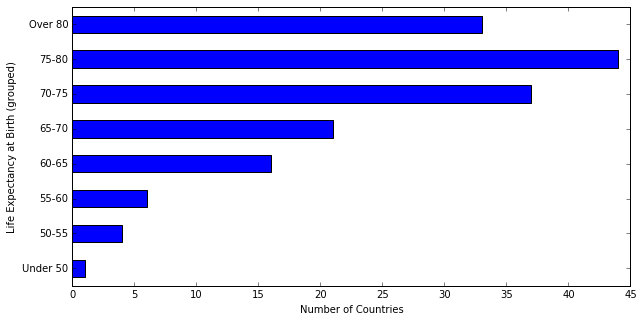

In [130]:
#Look ar records from 2013
df_le_2013 = df_le_clean[df_le_clean['Year'] == '2012-01-01']
df_le_2013.groupby(['LEB'])['Country'].count().plot(kind='barh', figsize=(10,5))
pyplot.xlabel("Number of Countries")
pyplot.ylabel("Life Expectancy at Birth (grouped)")

In [53]:
#group by country
le_by_country = df_le_clean.groupby('Country')

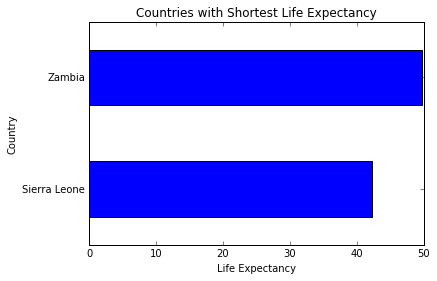

In [54]:
#Countries with the shortest life expectancy
le_by_country['LEatBirth'].mean()[le_by_country['LEatBirth'].mean()<50].plot(kind='barh')
pyplot.xlabel("Life Expectancy")
pyplot.title("Countries with Shortest Life Expectancy")

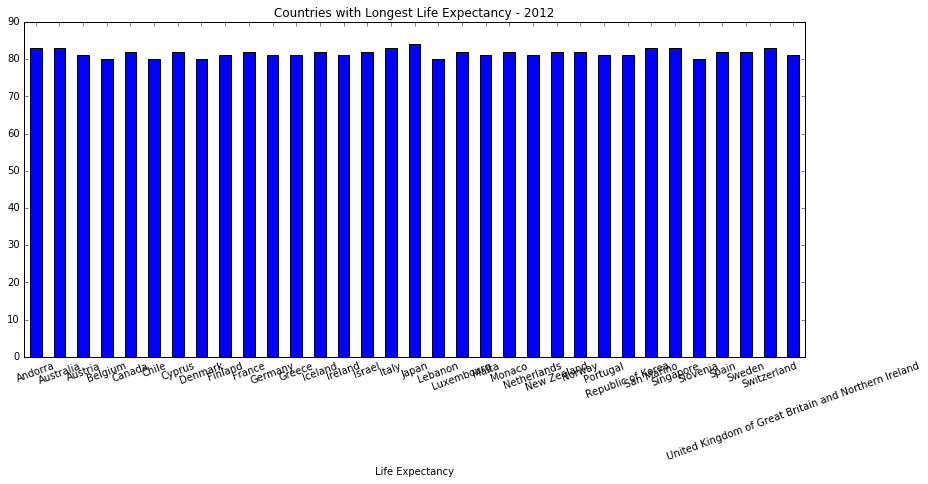

In [131]:
#countries with the highest Life Expectancies
le_by_country2 = df_le_clean[df_le_clean.Year=='2012-01-01'].groupby('Country')
le_by_country2['LEatBirth'].mean()[le_by_country2['LEatBirth'].mean()>79].plot(kind='bar', figsize=(14,6), rot=20)
pyplot.xlabel("Life Expectancy")
pyplot.title("Countries with Longest Life Expectancy - 2012")

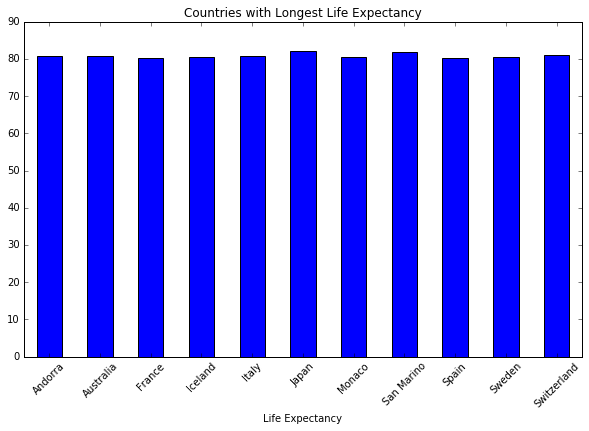

In [115]:
#countries with the highest Life Expectancies - mean for all years
le_by_country['LEatBirth'].mean()[le_by_country['LEatBirth'].mean()>80].plot(kind='bar', figsize=(10,6), rot=45)
pyplot.xlabel("Life Expectancy")
pyplot.title("Countries with Longest Life Expectancy")

In [56]:
# look at countries with largest difference b/t LEatBirth and LEat60 (using median values across years of data)
le_variance = abs(le_by_country['LEatBirth'].median() - (le_by_country['LEat60'].median() + 60)).sort_values(ascending=False)
le_variance.head(10)

Country
Sierra Leone                   29.5
Lesotho                        26.0
Zambia                         26.0
Nigeria                        25.0
Somalia                        24.0
Malawi                         23.5
Uganda                         23.5
South Sudan                    23.5
Swaziland                      23.0
United Republic of Tanzania    21.0
dtype: float64

([<matplotlib.axis.XTick at 0xe1c2a90>,
 <a list of 3 Text xticklabel objects>)

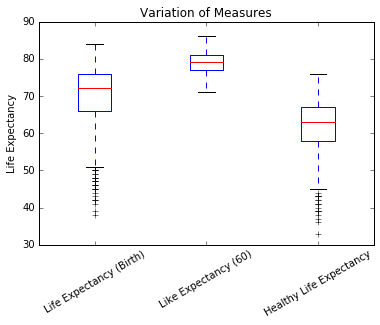

In [111]:
# box plot to see 
df_le_clean[['LEatBirth', 'LEat60-Adj', 'HALEatBirth']].plot(kind='box', return_type='axes', rot=30)
pyplot.title ("Variation of Measures")
pyplot.ylabel("Life Expectancy")
xlabels = ['Life Expectancy (Birth)', 'Like Expectancy (60)', 'Healthy Life Expectancy']
pyplot.xticks([1, 2, 3,], xlabels)

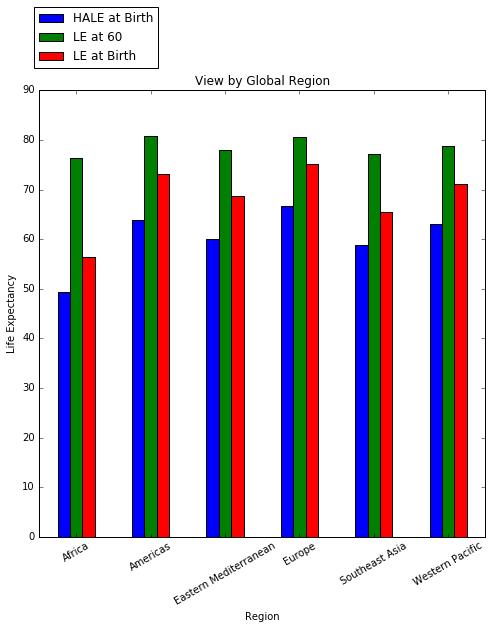

In [58]:
# look at spread by global region
df_le_clean.groupby('Region')[['HALEatBirth', 'LEat60-Adj', 'LEatBirth']].mean().plot(kind = 'bar', figsize = (8,8), rot=30)
pyplot.title ("View by Global Region")
pyplot.ylabel("Life Expectancy")
pyplot.legend(["HALE at Birth", 'LE at 60', 'LE at Birth'], bbox_to_anchor=(.28, 1.2))


## Aid Exploration

In [59]:
# commitments are noted by year
df_c.head()

,Country; Year,Commitments,Disbursements,Country,Year
0,Afghanistan; 2010,386.92,300.09,Afghanistan,2010-01-01
1,Afghanistan; 2009,254.04,345.59,Afghanistan,2009-01-01
2,Afghanistan; 2008,459.80,254.46,Afghanistan,2008-01-01
3,Afghanistan; 2007,217.22,254.40,Afghanistan,2007-01-01
4,Afghanistan; 2006,334.53,186.74,Afghanistan,2006-01-01


In [60]:
?c_by_year.plot

Object `c_by_year.plot` not found.


([<matplotlib.axis.YTick at 0xa433908>,
 <a list of 6 Text yticklabel objects>)

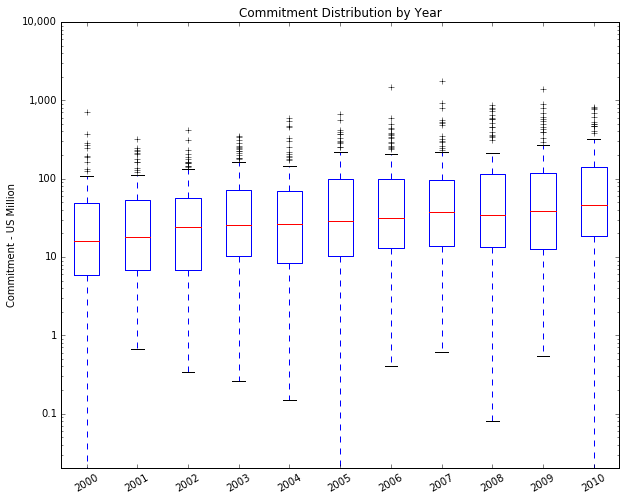

In [61]:
# look at variations in commitments by year
# using pivot to get years as columns
# using logy (non-linear) to better display the distribution
xlabels = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010']
ylabels = ['0.1', '1','10', '100', '1,000', '10,000']
c_by_year = df_c.pivot_table(index=['Country'], columns=['Year'],values=['Commitments'], aggfunc = sum)
c_by_year.plot(kind='box', return_type='axes', rot=30, figsize=(10,8), ylim = (0,10**4), logy=True)
pyplot.title ("Commitment Distribution by Year")
pyplot.ylabel("Commitment - US Million")
pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], xlabels)
pyplot.yticks([10**-1, 10**0, 10**1, 10**2, 10**3, 10**4], ylabels)


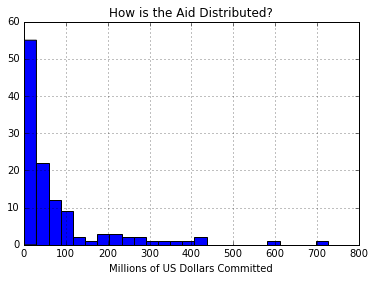

In [62]:
# distribution of committed aid across years
commitments_by_country['Commitments'].mean().hist(bins=25)
pyplot.xlabel("Millions of US Dollars Committed")
pyplot.title("How is the Aid Distributed?")

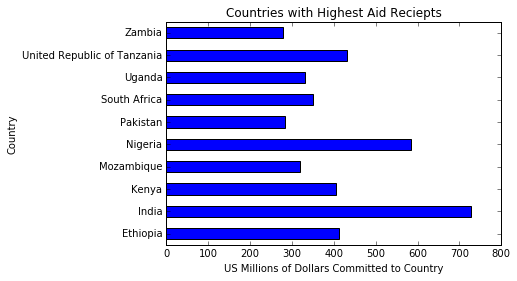

In [63]:
# countries with the most beneftis
commitments_by_country['Commitments'].mean()[commitments_by_country['Commitments'].mean()>250].plot(kind='barh')
pyplot.title("Countries with Highest Aid Reciepts")
pyplot.xlabel("US Millions of Dollars Committed to Country")

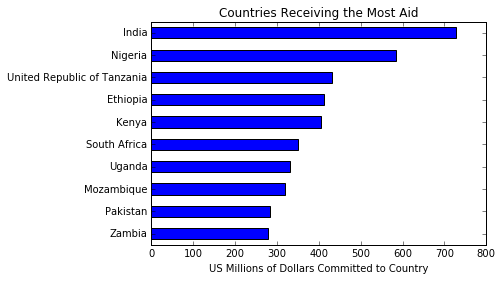

In [64]:
# countries with the most beneftis
plot_data = commitments_by_country['Commitments'].mean()[commitments_by_country['Commitments'].mean()>250].sort_values()
plot_data.plot(kind='barh')
pyplot.title("Countries Receiving the Most Aid")
pyplot.xlabel("US Millions of Dollars Committed to Country")
pyplot.ylabel("")

In [65]:
# look at commitments by region
# # first map region in (compare to Region / Country dataset)
# merging (joining) the commitments data set with the Region Country map; joining field is "Country"
df_c_region = pd.merge(df_c, rc_map, on='Country')

df_c_region['Region'].value_counts()

Americas                 242
Africa                   220
Europe                   173
Eastern Mediterranean    143
Western Pacific          110
Southeast Asia            88
Name: Region, dtype: int64

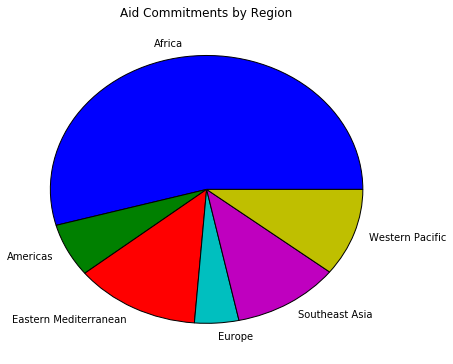

In [66]:
region_commitments_2010 = df_c_region[df_c_region['Year']=='2010-01-01'].groupby(['Region'])['Commitments'].sum()
region_commitments_2010.plot(kind='pie', subplots=True, figsize = (7,6))
pyplot.title("Aid Commitments by Region")
pyplot.ylabel("")


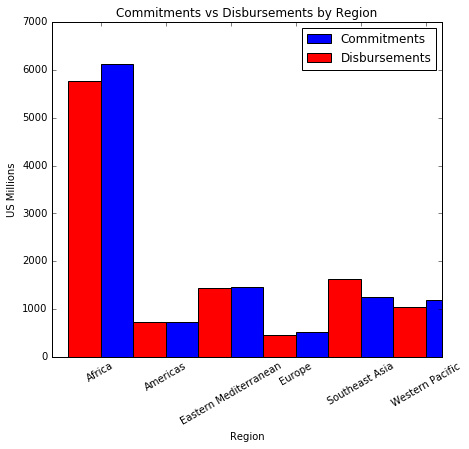

In [67]:
# commitments vs disbursements by region
reg_com_dis_2010 = df_c_region[df_c_region['Year']=='2010-01-01'].groupby(['Region'])['Commitments', 'Disbursements'].sum()
reg_com_dis_2010['Commitments'].plot(kind='bar', label="Commitments", figsize = (7,6), position=0, color='Blue', rot=30)
reg_com_dis_2010['Disbursements'].plot(kind='bar', label="Disbursements", figsize = (7,6), position=1, color='Red', rot=30)
pyplot.title("Commitments vs Disbursements by Region")
pyplot.ylabel("US Millions")
pyplot.legend()

c:\Users\u958Pope\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\core\frame.py:1997: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  "DataFrame index.", UserWarning)


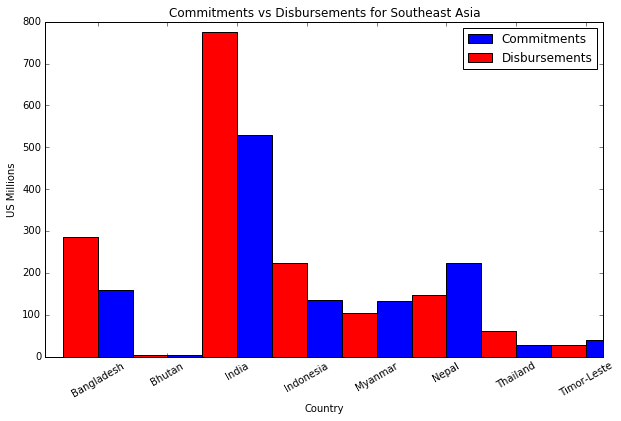

In [68]:
# biggest variation (percentage wise, is in SE Asia - lets look by country)
# this only includes SEAsia countries that receive any aid
seasia_cd = df_c_region[df_c_region['Year']=='2010-01-01'][df_c_region['Region']=='Southeast Asia'].groupby(['Country'])['Commitments', 'Disbursements'].sum()
seasia_cd['Commitments'].plot(kind='bar', label="Commitments", figsize = (10,6), position=0, color='Blue', rot=30)
seasia_cd['Disbursements'].plot(kind='bar', label="Disbursements", figsize = (10,6), position=1, color='Red', rot=30)
pyplot.title("Commitments vs Disbursements for Southeast Asia")
pyplot.ylabel("US Millions")
pyplot.legend()

# Aid Comparison to LE

In [69]:
# will compare mean LE at Birth with mean Commitment data
# year to year comparisons, are too strict, as impact of aid, could be over time

df_le_clean.head()

,Country,HALEatBirth,LEat60,LEat60-Adj,LEatBirth,Year,Region,LEB,LE60-Adj,HALE
0,Afghanistan,50,16,76,61,2013-01-01,Eastern Mediterranean,60-65,75-80,50-55
1,Afghanistan,49,16,76,60,2012-01-01,Eastern Mediterranean,60-65,75-80,Under 50
2,Afghanistan,45,15,75,55,2000-01-01,Eastern Mediterranean,55-60,75-80,Under 50
3,Afghanistan,NaN,14,74,49,1990-01-01,Eastern Mediterranean,Under 50,70-75,NaN
4,Albania,65,19,79,74,2013-01-01,Europe,70-75,75-80,65-70


In [70]:
# create LE dataset for joining
le_temp = df_le_clean.groupby(['Region', 'Country'])['LEatBirth'].mean()
#remove Region and Country from index (so can join)
le = le_temp.reset_index()
#le.columns
le.head()

,Region,Country,LEatBirth
0,Africa,Botswana,59.50
1,Africa,Eritrea,55.00
2,Africa,Ethiopia,56.25
3,Africa,Gambia,57.50
4,Africa,Ghana,60.00


In [71]:
# create Commitment dataset for joining
c_temp = df_c_region.groupby(['Country'])['Commitments'].mean()
#remove Region and Country from index (so can join)
c = c_temp.reset_index()
c.head()


,Country,Commitments
0,Afghanistan,202.500909
1,Albania,23.777273
2,Argentina,21.648182
3,Armenia,19.489091
4,Azerbaijan,16.588182


In [72]:
# join (merge) LE and Commitment data; doing outter join to keep all countries, even those not receiving aid
le_c = pd.merge(le, c, how='outer', on='Country')
le_c.Commitments.fillna(0, inplace=True)
le_c.head(20)

,Region,Country,LEatBirth,Commitments
0,Africa,Botswana,59.50,73.323636
1,Africa,Eritrea,55.00,32.640909
2,Africa,Ethiopia,56.25,413.290909
3,Africa,Gambia,57.50,12.850909
4,Africa,Ghana,60.00,192.429091
5,Africa,Kenya,58.50,406.039091
6,Africa,Lesotho,52.25,45.190000
7,Africa,Liberia,54.25,42.887273
8,Africa,Malawi,52.00,199.942727
9,Africa,Mauritius,72.50,0.777273


In [73]:
le_c['Region'].value_counts()

Europe                   52
Americas                 33
Western Pacific          26
Africa                   22
Eastern Mediterranean    20
Southeast Asia            9
Name: Region, dtype: int64

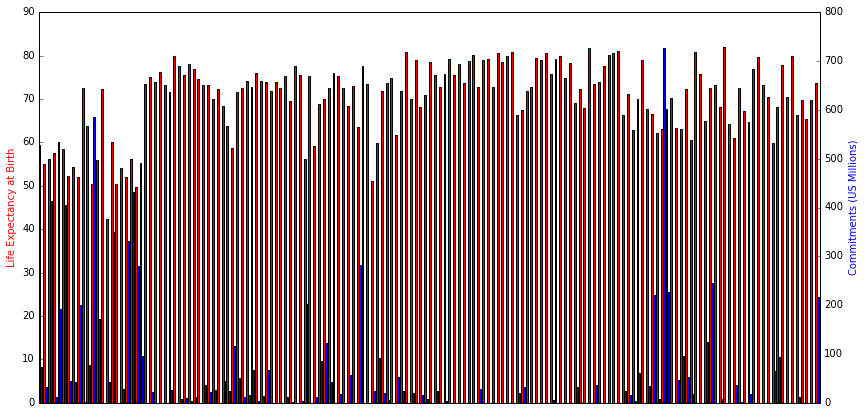

In [74]:
# building a dual axis to plot together (and compare variances)
fig = pyplot.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

le_c['LEatBirth'].plot(kind='bar', color='red', ax=ax, width=width, position=1, figsize=(14,7))
le_c['Commitments'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(14,7))

ax.set_ylabel('Life Expectancy at Birth', color='red')
ax2.set_ylabel('Commitments (US Millions)', color='blue')
pyplot.xticks([], "")
pyplot.xlabel('Countries')
pyplot.show()

In [75]:
le_c_region = le_c.groupby('Region')[['LEatBirth', 'Commitments']].mean()
le_c_region

,LEatBirth,Commitments
Region,,
Africa,56.375000,173.261570
Americas,73.242424,17.993278
Eastern Mediterranean,68.725000,50.843682
Europe,75.235577,7.520700
Southeast Asia,65.416667,155.048889
Western Pacific,71.115385,31.674755


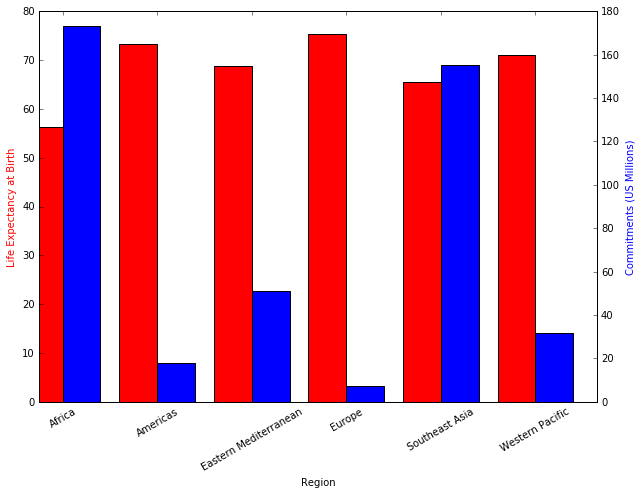

In [76]:
# second dual axis, at region level this time)
fig = pyplot.figure() # Create matplotlib figure

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

le_c_region['LEatBirth'].plot(kind='bar', color='red', ax=ax, width=width, position=1, figsize=(10,7), rot=30)
le_c_region['Commitments'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(10,7), rot=30)

ax.set_ylabel('Life Expectancy at Birth', color='red')
ax2.set_ylabel('Commitments (US Millions)', color='blue')
#pyplot.xticks([], "")
pyplot.xlabel('')
pyplot.show()

In [77]:
def show_le_c_by_region(region, f_le_c):
    # this function plots LE vs Commitments for specific countries within a defined region for a given DF
    
    # DF must include Region, Country, Commitments, and LEatBirth 
    fig = pyplot.figure() # Create matplotlib figure

    ax = fig.add_subplot(111) # Create matplotlib axes
    ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

    width = 0.4

    f_le_c[f_le_c['Region']==region]['LEatBirth'].plot(kind='bar', color='red', ax=ax, width=width, position=1, figsize=(14,7))
    f_le_c[f_le_c['Region']==region]['Commitments'].plot(kind='bar', color='blue', ax=ax2, width=width, position=0, figsize=(14,7))

    ax.set_ylabel('Life Expectancy at Birth', color='red')
    ax2.set_ylabel('Commitments (US Millions)', color='blue')

    labels = [item.get_text() for item in ax.get_xticklabels()]

    new_labels = []
    for x in labels:
        new_labels.append(f_le_c.loc[int(x)]['Country'])
    ax.set_xticklabels(new_labels)

    pyplot.title(region)
    pyplot.show()
    return

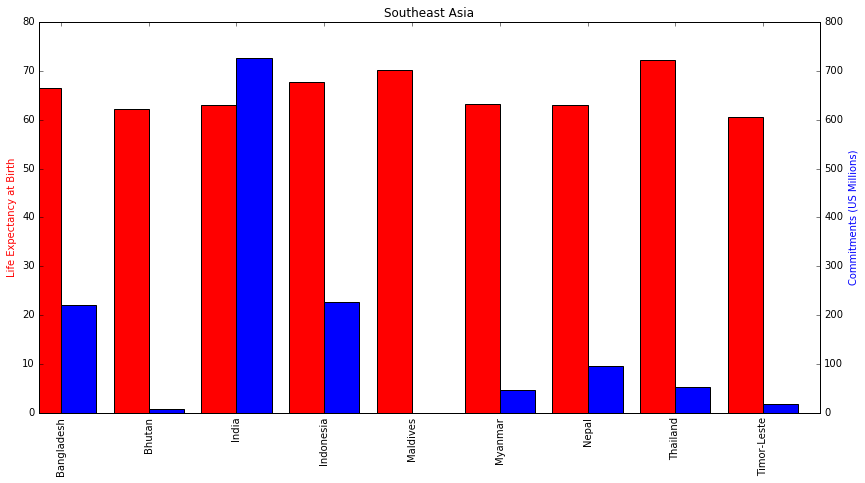

In [78]:
# anticipate highest aid to go areas with low LE
# southeast asi, high amount of aid and high LE; anticipate a large variation by country
# let's check
# building a dual axis to plot at country level for Southest Asia
show_le_c_by_region('Southeast Asia', le_c)

# India is very high, but this could be due to Population, as well as LE; as their LE is in line; more analysis with
# additional data could test this further hypothesis

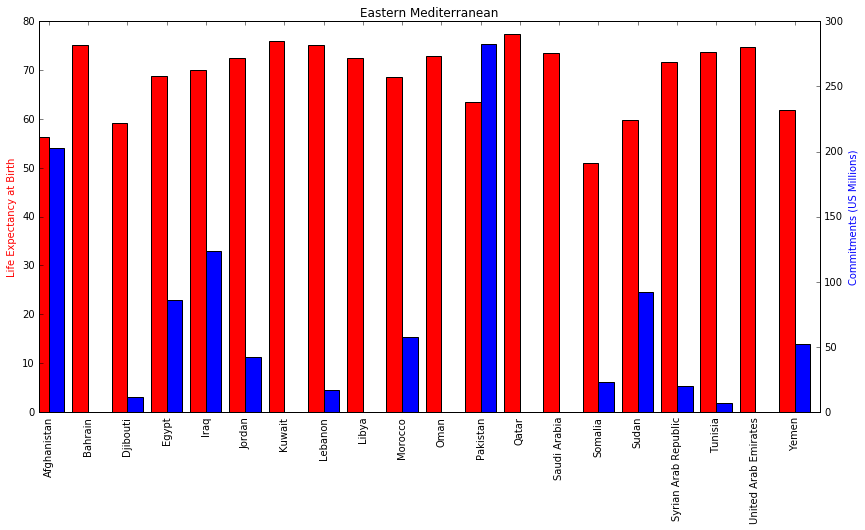

In [79]:
# lets look at Eastern Med now, where the LE is high
show_le_c_by_region('Eastern Mediterranean', le_c)


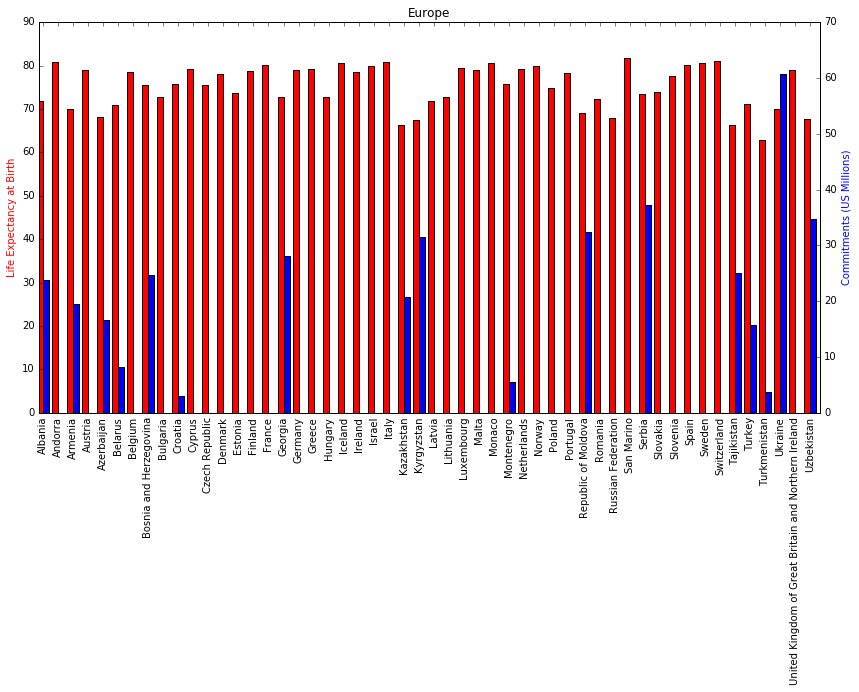

In [80]:
# lets look at Europe now, where the LE is high
show_le_c_by_region('Europe', le_c)

# result show Western Europe, as anticipated receives majority of aid

## Water and Santiation Exploration

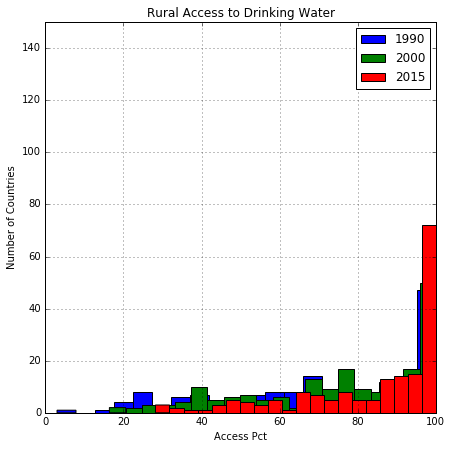

In [81]:
# Histograms by year for Rural access to water
df_exp[df_exp.Year=='1990'].IWRuralPct.plot(figsize=(7,7), kind="hist", bins=20, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWRuralPct.plot(kind="hist", bins=20, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWRuralPct.plot(kind="hist", bins=20, label="2015", grid=True)
pyplot.title("Rural Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

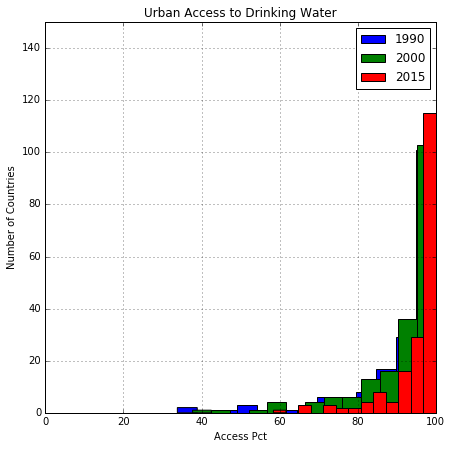

In [82]:
# Histograms by year for Urban access to water
df_exp[df_exp.Year=='1990'].IWUrbanPct.plot(figsize=(7,7), kind="hist", bins=13, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWUrbanPct.plot(kind="hist", bins=13, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWUrbanPct.plot(kind="hist", bins=13, label="2015", grid=True)
pyplot.title("Urban Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

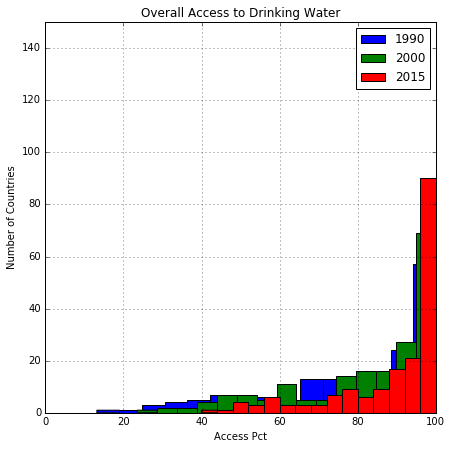

In [83]:
# Histograms by year for Overall access to water
df_exp[df_exp.Year=='1990'].IWPct.plot(figsize=(7,7), kind="hist", bins=15, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].IWPct.plot(kind="hist", bins=15, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].IWPct.plot(kind="hist", bins=15, label="2015", grid=True)
pyplot.title("Overall Access to Drinking Water")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

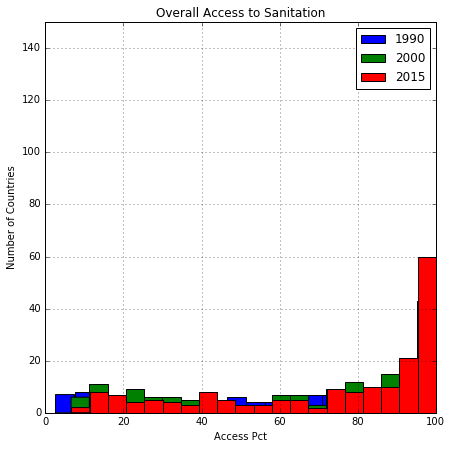

In [84]:
# Histograms by year for total access to sanitation
df_exp[df_exp.Year=='1990'].ISPct.plot(figsize=(7,7), kind="hist", bins=20, label="1990", xlim=(0, 100), ylim=(0, 150), grid=True)
df_exp[df_exp.Year=='2000'].ISPct.plot(kind="hist", bins=20, label="2000", grid=True)
df_exp[df_exp.Year=='2015'].ISPct.plot(kind="hist", bins=20, label="2015", grid=True)
pyplot.title("Overall Access to Sanitation")
pyplot.xlabel("Access Pct")
pyplot.ylabel("Number of Countries")
pyplot.legend()

In [85]:
# Countries with lowest combined rural access to water & sanitation
exp_by_country = df_exp.groupby('Country')
exp_by_country.mean()[(exp_by_country.IWRuralPct.mean() + exp_by_country.ISRuralPct.mean()) < 50]

,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct
Country,,,,,,
Chad,40.900000,60.266667,45.100000,5.400000,26.000000,9.866667
Congo,36.050000,95.466667,72.850000,5.600000,18.850000,13.850000
Democratic Republic of the Congo,27.566667,84.133333,47.700000,20.666667,29.333333,23.533333
Ethiopia,23.500000,87.966667,33.133333,11.433333,23.500000,13.066667
Madagascar,25.266667,76.166667,39.666667,8.100000,16.566667,10.566667
Mozambique,29.033333,75.866667,42.433333,5.666667,37.900000,14.966667
Niger,38.133333,79.700000,45.200000,2.800000,27.866667,7.133333
Papua New Guinea,28.066667,87.600000,36.300000,13.066667,59.300000,19.433333
Sierra Leone,33.133333,76.800000,48.833333,5.633333,22.066667,11.566667


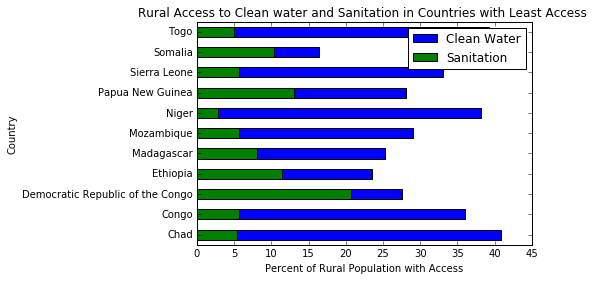

In [86]:
exp_by_country.IWRuralPct.mean()[(exp_by_country.IWRuralPct.mean() + exp_by_country.ISRuralPct.mean()) < 50].plot(legend = True, label = "Clean Water", kind = "barh")
exp_by_country.ISRuralPct.mean()[(exp_by_country.IWRuralPct.mean() + exp_by_country.ISRuralPct.mean()) < 50].plot(legend = True, label = "Sanitation", color = "g", kind = "barh")
pyplot.title("Rural Access to Clean water and Sanitation in Countries with Least Access ")
pyplot.xlabel("Percent of Rural Population with Access")

# Comparing Access to Water and Sanitation against Life Expectancy

In [87]:
# Function to make 2013 data look like 2015 data so we can join 2015 to 2015 data
from datetime import datetime
def push2015(value):
    if value == datetime.strptime('2013','%Y'):
        return datetime.strptime('2015','%Y')
    else:
        return value

In [88]:
df_le_clean_w = df_le_clean

In [89]:
df_le_clean_w['Year'] = df_le_clean_w['Year'].apply(push2015)

In [90]:
# We don't have water data for 2012, so remove it from our comparison set
df_le_clean_w = df_le_clean_w[df_le_clean_w.Year != '2012']

In [91]:
# Merge (Join) Life Expectancy and Water data
df_le_exp = pd.merge(df_le_clean_w, df_exp)

In [92]:
# Only look at countries where we have 3 years of samples in both LE and Water
df3 = df_le_exp['Country'].groupby(df_le_exp['Country']).count()
df3 = df3.to_frame()
df3.columns = ['Count']
df3.reset_index(level=0, inplace=True)
df3 = df3[df3.Count == 3]
df3_le_exp = pd.merge(df_le_exp, df3)

In [93]:
# Examine correlations between Water/Sanitation Access and Life Expectancy
df3_le_exp_corr = df3_le_exp.corr()
df3_le_exp_corr = df3_le_exp_corr[['IWRuralPct','IWUrbanPct','IWPct','ISRuralPct','ISUrbanPct','ISPct']]
df3_le_exp_corr.loc[:'LEatBirth']

,IWRuralPct,IWUrbanPct,IWPct,ISRuralPct,ISUrbanPct,ISPct
HALEatBirth,0.721630,0.605282,0.760497,0.781505,0.813864,0.822283
LEat60,0.537267,0.478050,0.581113,0.573080,0.560381,0.601530
LEat60-Adj,0.537267,0.478050,0.581113,0.573080,0.560381,0.601530
LEatBirth,0.721812,0.602502,0.773956,0.769797,0.795374,0.814427


## Health Services Data Exploration

In [94]:
df_hs.head()

,Country,Total_pct_GDP,Govt_pct_total,Pvt_pct_total,Pocket_pct_total,Year
0,Afghanistan,NaN,NaN,NaN,NaN,2000-01-01
1,Albania,6.3,36.1,63.9,63.8,2000-01-01
2,Algeria,3.5,73.3,26.7,25.8,2000-01-01
3,Andorra,6.0,64.8,35.2,26.6,2000-01-01
4,Angola,3.4,49.5,50.5,36.1,2000-01-01


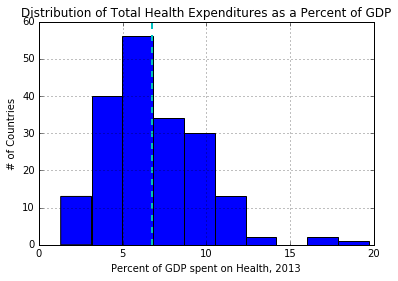

In [95]:
df_hs.Total_pct_GDP[df_hs.Year =='2013'].hist()
pyplot.xlabel("Percent of GDP spent on Health, 2013")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Total Health Expenditures as a Percent of GDP")
pyplot.axvline(HS["Total_pct_GDP2013"].mean(), color='c', linestyle='dashed', linewidth=2)

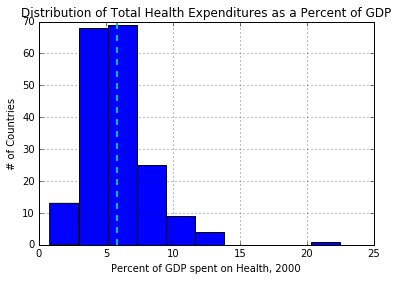

In [96]:
df_hs.Total_pct_GDP[df_hs.Year =='2000'].hist()
pyplot.xlabel("Percent of GDP spent on Health, 2000")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Total Health Expenditures as a Percent of GDP")
pyplot.axvline(HS["Total_pct_GDP2000"].mean(), color='c', linestyle='dashed', linewidth=2)

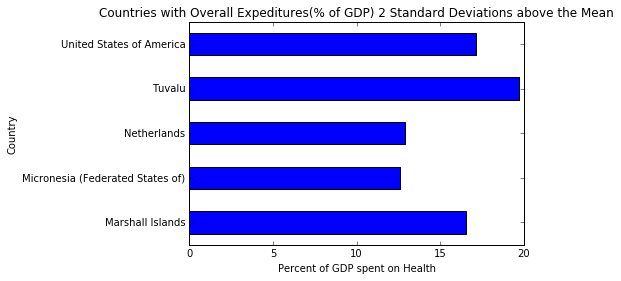

In [97]:
# All of the countries with government expeditures 2 or more standard deviations above the mean
hs_2013 = df_hs[df_hs.Year =='2013']
cut_off = hs_2013.Total_pct_GDP.mean() + 2*hs_2013.Total_pct_GDP.std() 
cut_off
hs_2013_subset = hs_2013[hs_2013.Total_pct_GDP >= cut_off]
hs_2013_subset.set_index("Country", inplace = True)
hs_2013_subset.Total_pct_GDP.plot(kind = "barh")
pyplot.title("Countries with Overall Expeditures(% of GDP) 2 Standard Deviations above the Mean")
pyplot.xlabel("Percent of GDP spent on Health")

## HIV Prevalance Exploration

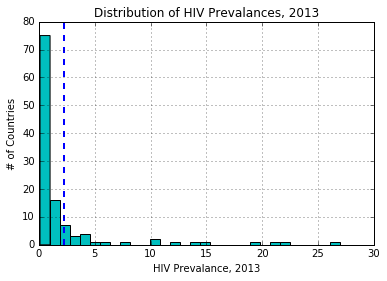

In [98]:
df_HIV.HIV_Rate[df_HIV.Year == "2013"].hist(bins = 30, color = 'c')
pyplot.xlabel("HIV Prevalance, 2013")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of HIV Prevalances, 2013")
pyplot.axvline(HIV.HIV2013.mean(), color='b', linestyle='dashed', linewidth=2)

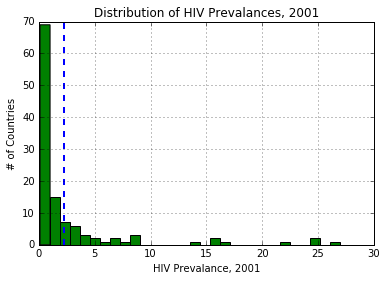

In [99]:
df_HIV.HIV_Rate[df_HIV.Year == "2001"].hist(bins = 30, color = 'g')
pyplot.xlabel("HIV Prevalance, 2001")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of HIV Prevalances, 2001")
pyplot.axvline(HIV.HIV2013.mean(), color='b', linestyle='dashed', linewidth=2)

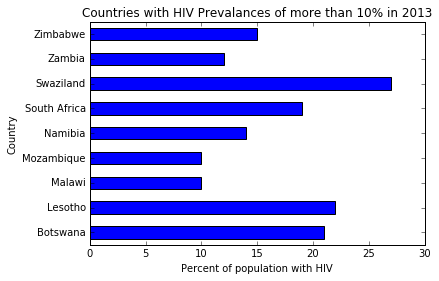

In [100]:
# All of the countries with HIV rates over 10%
hiv_2013 = df_HIV[df_HIV.Year =='2013']
hiv_2013_subset = hiv_2013[hiv_2013.HIV_Rate >= 10]
high_HIV_countries = hiv_2013_subset.Country
hiv_2013_subset.set_index("Country", inplace = True)
hiv_2013_subset.HIV_Rate.plot(kind = "barh")
pyplot.title("Countries with HIV Prevalances of more than 10% in 2013")
pyplot.xlabel("Percent of population with HIV")

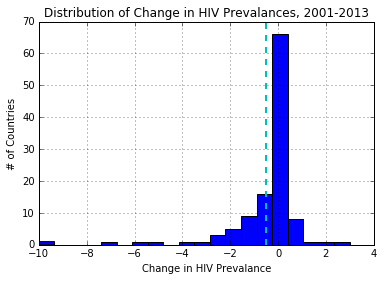

In [101]:
#Change in HIV prevalances between 2001 and 2013
HIV["Increase"] = HIV["HIV2013"] - HIV["HIV2001"]
HIV.Increase.hist(bins = 20)
pyplot.xlabel("Change in HIV Prevalance")
pyplot.ylabel("# of Countries")
pyplot.title("Distribution of Change in HIV Prevalances, 2001-2013")
pyplot.axvline(HIV.Increase.mean(), color='c', linestyle='dashed', linewidth=2)

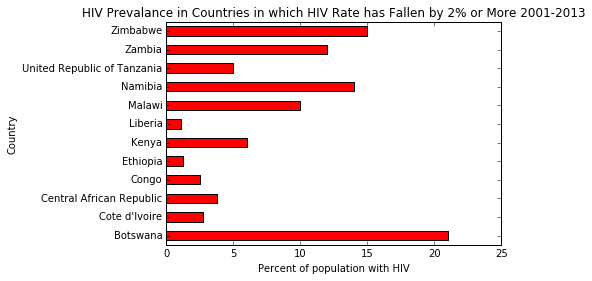

In [102]:
# Current HIV Rate of all of the countries who have decreased thier HIV rate by more than 2%
HIV_decrease = HIV[HIV.Increase <= -2]
HIV_decrease.set_index("Country", inplace = True)
HIV_decrease.HIV2013.plot(kind = "barh", color = 'r')
pyplot.title("HIV Prevalance in Countries in which HIV Rate has Fallen by 2% or More 2001-2013")
pyplot.xlabel("Percent of population with HIV")

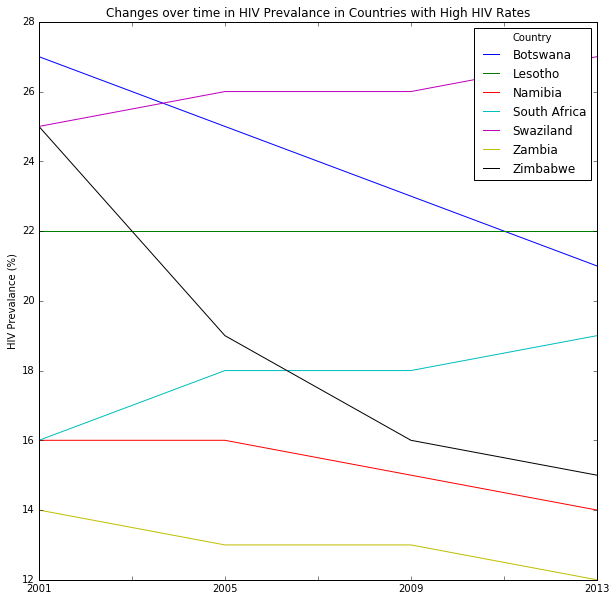

In [103]:
#HIV Rate over time in countries with high HIV prevalence
cols = ["Country","HIV2001", "HIV2005", "HIV2009", "HIV2013"]
HIV_ordered = HIV[cols]
HIV_ordered.columns = ["Country", "2001", "2005", "2009", "2013"]
highHIV = HIV_ordered[HIV_ordered["2013"] >10]
highHIV.set_index("Country", inplace = True)
highHIV_flipped = highHIV.T
highHIV_flipped.plot( figsize = (10,10))
pyplot.title("Changes over time in HIV Prevalance in Countries with High HIV Rates")
pyplot.ylabel("HIV Prevalance (%)")